# ***Engr.Muhammad Javed***

## **Logistic Regression:**

## *Importing Required Libraries*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , StandardScaler , FunctionTransformer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector

## *Loading the Dataset*


In [3]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\Social_Network_Ads.csv")

## *Show Dataset*


In [4]:
Dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## *Viewing Statistical Summary of the Dataset*


In [5]:
Dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## *Checking Dataset Information*


In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
Dataset.drop(["User ID" , "Gender" , "EstimatedSalary"] , axis = 1 , inplace = True)

In [10]:
Dataset

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


## *Visualizing Age vs Purchased Scatter Plot*


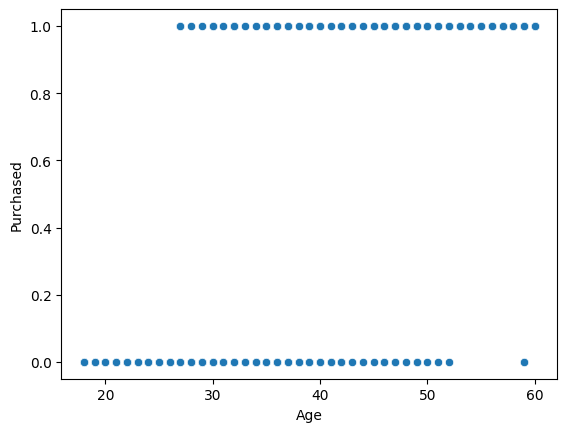

In [11]:
sn.scatterplot(x = "Age" , y = "Purchased" , data = Dataset)
plt.show()


## *Splitting Features and target Variable*


In [12]:
x = Dataset[["Age"]]
y = Dataset[["Purchased"]]

## *Splitting Dataset into Training and Testing Sets*


In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(x , y , random_state=42 , test_size= 0.2)

## *Training the Logistic Regression Model*

In [14]:
Lr = LogisticRegression()
Lr.fit(X_train , Y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
Lr.score(X_test , Y_test)*100

91.25

In [17]:
Lr.predict([[40]])

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

## *Visualizing Logistic Regression Predictions vs Actual Data*


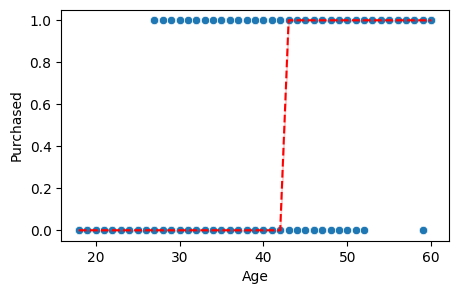

In [23]:
plt.figure(figsize= (5,3))

sn.scatterplot(x = "Age" , y = "Purchased" , data = Dataset)
sn.lineplot(x = "Age" , y = Lr.predict(x) , data=Dataset , color = "red" , linestyle = "--")
plt.show()